# Predicting department-wise sales for each store

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
feature = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df = train.merge(feature,how = 'left').merge(stores, how = 'left')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [7]:
df.shape

(421570, 16)

In [8]:
data = df.sample(50000)

In [9]:
data.shape

(50000, 16)

# Data Cleaning - Handling null data

In [10]:
data.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1       32129
MarkDown2       36761
MarkDown3       33767
MarkDown4       34018
MarkDown5       32048
CPI                 0
Unemployment        0
Type                0
Size                0
dtype: int64

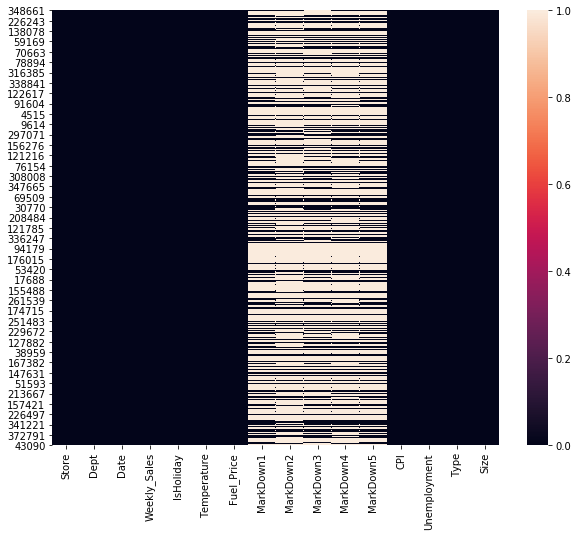

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isna())
plt.show()

In [12]:
data.MarkDown1 = data.MarkDown1.fillna(0)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
348661,37,17,2010-05-28,249.56,False,80.87,2.759,0.00,NaN,NaN,NaN,NaN,209.666051,8.464,C,39910
181501,19,33,2010-12-10,9501.13,False,25.12,3.255,0.00,NaN,NaN,NaN,NaN,132.676400,8.067,A,203819
253769,26,60,2011-03-25,96.80,False,22.99,3.624,0.00,NaN,NaN,NaN,NaN,133.958742,7.907,A,152513
298158,31,33,2010-11-05,7145.63,False,58.71,2.689,0.00,NaN,NaN,NaN,NaN,211.613505,8.163,A,203750
85833,9,74,2010-02-05,8076.88,False,38.01,2.572,0.00,NaN,NaN,NaN,NaN,214.655459,6.415,B,125833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313802,32,97,2011-08-19,18670.20,False,73.72,3.499,0.00,NaN,NaN,NaN,NaN,194.250063,8.622,A,203007
413781,45,13,2012-08-17,28507.09,False,75.71,3.807,3657.79,6.0,0.3,1630.5,3794.22,191.228492,8.684,B,118221
85719,9,72,2010-08-27,30852.97,False,84.01,2.619,0.00,NaN,NaN,NaN,NaN,215.119954,6.442,B,125833
4609,1,34,2011-04-22,10357.32,False,72.99,3.807,0.00,NaN,NaN,NaN,NaN,215.459905,7.682,A,151315


In [13]:
data.MarkDown2 = data.MarkDown2.fillna(0)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
348661,37,17,2010-05-28,249.56,False,80.87,2.759,0.00,0.0,NaN,NaN,NaN,209.666051,8.464,C,39910
181501,19,33,2010-12-10,9501.13,False,25.12,3.255,0.00,0.0,NaN,NaN,NaN,132.676400,8.067,A,203819
253769,26,60,2011-03-25,96.80,False,22.99,3.624,0.00,0.0,NaN,NaN,NaN,133.958742,7.907,A,152513
298158,31,33,2010-11-05,7145.63,False,58.71,2.689,0.00,0.0,NaN,NaN,NaN,211.613505,8.163,A,203750
85833,9,74,2010-02-05,8076.88,False,38.01,2.572,0.00,0.0,NaN,NaN,NaN,214.655459,6.415,B,125833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313802,32,97,2011-08-19,18670.20,False,73.72,3.499,0.00,0.0,NaN,NaN,NaN,194.250063,8.622,A,203007
413781,45,13,2012-08-17,28507.09,False,75.71,3.807,3657.79,6.0,0.3,1630.5,3794.22,191.228492,8.684,B,118221
85719,9,72,2010-08-27,30852.97,False,84.01,2.619,0.00,0.0,NaN,NaN,NaN,215.119954,6.442,B,125833
4609,1,34,2011-04-22,10357.32,False,72.99,3.807,0.00,0.0,NaN,NaN,NaN,215.459905,7.682,A,151315


In [14]:
data.MarkDown3 = data.MarkDown3.fillna(0)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
348661,37,17,2010-05-28,249.56,False,80.87,2.759,0.00,0.0,0.0,NaN,NaN,209.666051,8.464,C,39910
181501,19,33,2010-12-10,9501.13,False,25.12,3.255,0.00,0.0,0.0,NaN,NaN,132.676400,8.067,A,203819
253769,26,60,2011-03-25,96.80,False,22.99,3.624,0.00,0.0,0.0,NaN,NaN,133.958742,7.907,A,152513
298158,31,33,2010-11-05,7145.63,False,58.71,2.689,0.00,0.0,0.0,NaN,NaN,211.613505,8.163,A,203750
85833,9,74,2010-02-05,8076.88,False,38.01,2.572,0.00,0.0,0.0,NaN,NaN,214.655459,6.415,B,125833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313802,32,97,2011-08-19,18670.20,False,73.72,3.499,0.00,0.0,0.0,NaN,NaN,194.250063,8.622,A,203007
413781,45,13,2012-08-17,28507.09,False,75.71,3.807,3657.79,6.0,0.3,1630.5,3794.22,191.228492,8.684,B,118221
85719,9,72,2010-08-27,30852.97,False,84.01,2.619,0.00,0.0,0.0,NaN,NaN,215.119954,6.442,B,125833
4609,1,34,2011-04-22,10357.32,False,72.99,3.807,0.00,0.0,0.0,NaN,NaN,215.459905,7.682,A,151315


In [15]:
data.MarkDown4 = data.MarkDown4.fillna(0)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
348661,37,17,2010-05-28,249.56,False,80.87,2.759,0.00,0.0,0.0,0.0,NaN,209.666051,8.464,C,39910
181501,19,33,2010-12-10,9501.13,False,25.12,3.255,0.00,0.0,0.0,0.0,NaN,132.676400,8.067,A,203819
253769,26,60,2011-03-25,96.80,False,22.99,3.624,0.00,0.0,0.0,0.0,NaN,133.958742,7.907,A,152513
298158,31,33,2010-11-05,7145.63,False,58.71,2.689,0.00,0.0,0.0,0.0,NaN,211.613505,8.163,A,203750
85833,9,74,2010-02-05,8076.88,False,38.01,2.572,0.00,0.0,0.0,0.0,NaN,214.655459,6.415,B,125833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313802,32,97,2011-08-19,18670.20,False,73.72,3.499,0.00,0.0,0.0,0.0,NaN,194.250063,8.622,A,203007
413781,45,13,2012-08-17,28507.09,False,75.71,3.807,3657.79,6.0,0.3,1630.5,3794.22,191.228492,8.684,B,118221
85719,9,72,2010-08-27,30852.97,False,84.01,2.619,0.00,0.0,0.0,0.0,NaN,215.119954,6.442,B,125833
4609,1,34,2011-04-22,10357.32,False,72.99,3.807,0.00,0.0,0.0,0.0,NaN,215.459905,7.682,A,151315


In [16]:
data.MarkDown5 = data.MarkDown5.fillna(0)
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
348661,37,17,2010-05-28,249.56,False,80.87,2.759,0.00,0.0,0.0,0.0,0.00,209.666051,8.464,C,39910
181501,19,33,2010-12-10,9501.13,False,25.12,3.255,0.00,0.0,0.0,0.0,0.00,132.676400,8.067,A,203819
253769,26,60,2011-03-25,96.80,False,22.99,3.624,0.00,0.0,0.0,0.0,0.00,133.958742,7.907,A,152513
298158,31,33,2010-11-05,7145.63,False,58.71,2.689,0.00,0.0,0.0,0.0,0.00,211.613505,8.163,A,203750
85833,9,74,2010-02-05,8076.88,False,38.01,2.572,0.00,0.0,0.0,0.0,0.00,214.655459,6.415,B,125833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313802,32,97,2011-08-19,18670.20,False,73.72,3.499,0.00,0.0,0.0,0.0,0.00,194.250063,8.622,A,203007
413781,45,13,2012-08-17,28507.09,False,75.71,3.807,3657.79,6.0,0.3,1630.5,3794.22,191.228492,8.684,B,118221
85719,9,72,2010-08-27,30852.97,False,84.01,2.619,0.00,0.0,0.0,0.0,0.00,215.119954,6.442,B,125833
4609,1,34,2011-04-22,10357.32,False,72.99,3.807,0.00,0.0,0.0,0.0,0.00,215.459905,7.682,A,151315


# Exploratory Data Analysis

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 348661 to 112370
Data columns (total 16 columns):
Store           50000 non-null int64
Dept            50000 non-null int64
Date            50000 non-null object
Weekly_Sales    50000 non-null float64
IsHoliday       50000 non-null bool
Temperature     50000 non-null float64
Fuel_Price      50000 non-null float64
MarkDown1       50000 non-null float64
MarkDown2       50000 non-null float64
MarkDown3       50000 non-null float64
MarkDown4       50000 non-null float64
MarkDown5       50000 non-null float64
CPI             50000 non-null float64
Unemployment    50000 non-null float64
Type            50000 non-null object
Size            50000 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 6.2+ MB


# Single Variable Analysis

In [18]:
data['Store'][:10]

348661    37
181501    19
253769    26
298158    31
85833      9
85146      9
319675    33
273083    28
42455      5
19169      2
Name: Store, dtype: int64

In [19]:
data['Store'].value_counts(ascending = False)

2     1279
15    1258
13    1253
34    1238
27    1231
1     1223
11    1220
23    1218
20    1215
10    1214
14    1203
24    1203
19    1201
32    1199
41    1191
40    1186
25    1181
26    1180
18    1179
4     1175
17    1174
39    1172
6     1164
28    1158
8     1151
7     1142
31    1141
21    1141
35    1139
12    1135
16    1127
45    1123
22    1114
29    1114
9     1087
5     1063
3     1061
38     870
37     853
44     841
30     833
43     812
33     803
42     782
36     753
Name: Store, dtype: int64

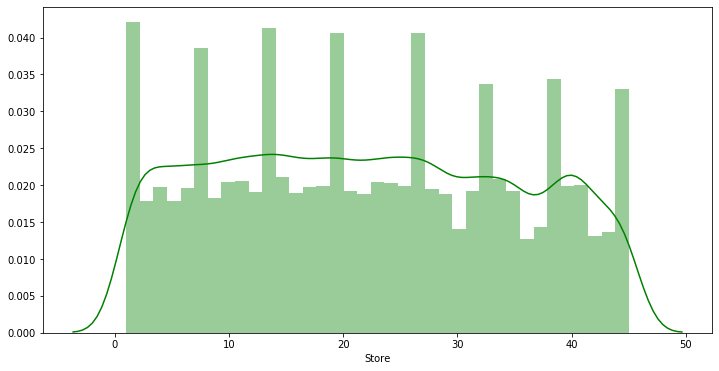

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(data['Store'],color='g')
plt.show()

In [21]:
data['Dept'].value_counts(ascending = False)

82    812
3     802
8     797
21    793
38    781
     ... 
78     28
77     18
65     11
39      3
43      1
Name: Dept, Length: 81, dtype: int64

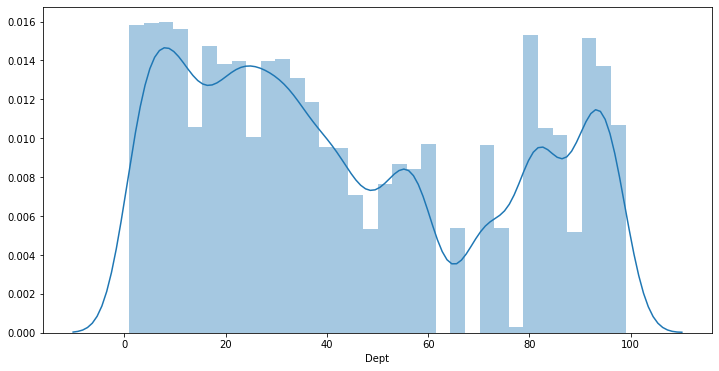

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(data['Dept'])
plt.show()

In [23]:
data['Weekly_Sales'].value_counts(ascending = False)

10.00       39
5.00        35
20.00       33
1.00        28
15.00       25
            ..
14853.84     1
67740.71     1
29041.46     1
90484.90     1
34171.61     1
Name: Weekly_Sales, Length: 47344, dtype: int64

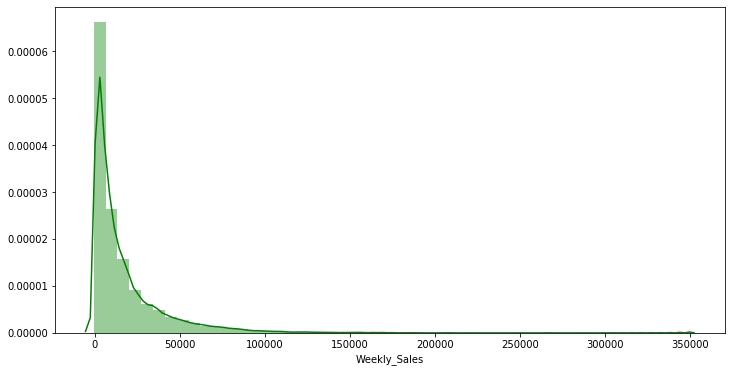

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(data['Weekly_Sales'],color='g')
plt.show()

In [25]:
data['IsHoliday'].value_counts(ascending = False)

False    46539
True      3461
Name: IsHoliday, dtype: int64

In [26]:
data['IsHoliday'].value_counts(normalize = True)

False    0.93078
True     0.06922
Name: IsHoliday, dtype: float64

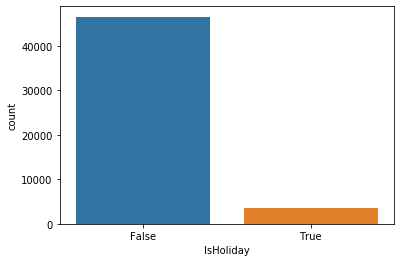

In [27]:
sns.countplot(data['IsHoliday'])
plt.show()

In [28]:
data['Temperature'][:10]

348661    80.87
181501    25.12
253769    22.99
298158    58.71
85833     38.01
85146     49.38
319675    56.50
273083    57.79
42455     89.42
19169     81.13
Name: Temperature, dtype: float64

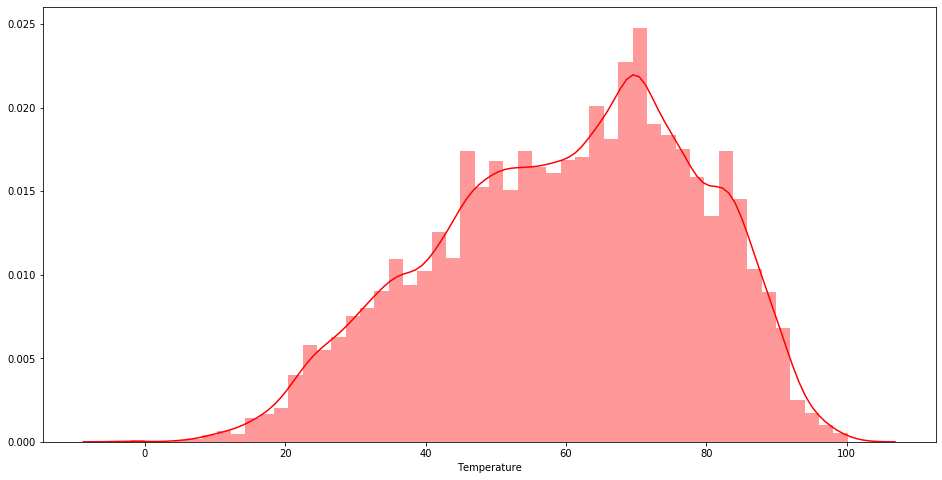

In [29]:
plt.figure(figsize=(16,8))
sns.distplot(data['Temperature'],color='r')
plt.show()

In [30]:
data['Fuel_Price'][:10]

348661    2.759
181501    3.255
253769    3.624
298158    2.689
85833     2.572
85146     3.290
319675    2.825
273083    3.130
42455     3.682
19169     2.759
Name: Fuel_Price, dtype: float64

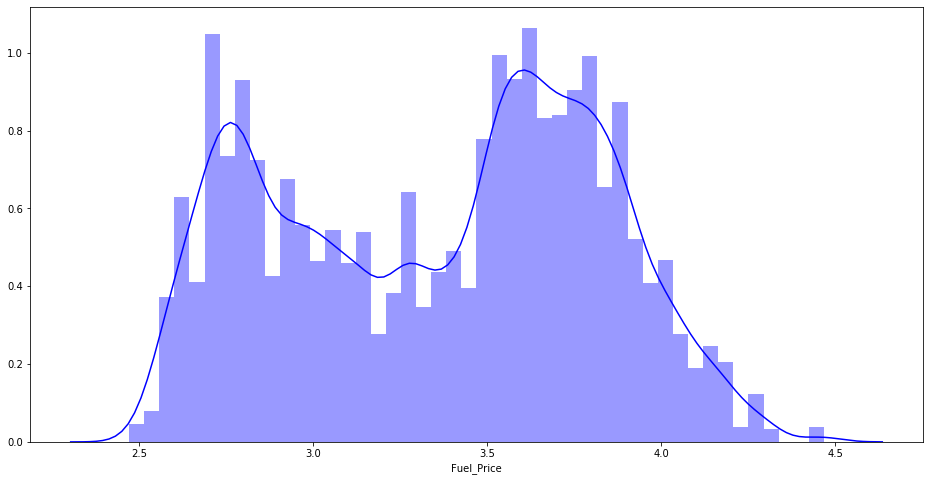

In [31]:
plt.figure(figsize=(16,8))
sns.distplot(data['Fuel_Price'],color='b')
plt.show()

In [32]:
data['CPI'][:10]

348661    209.666051
181501    132.676400
253769    133.958742
298158    211.613505
85833     214.655459
85146     223.806053
319675    126.552286
273083    126.546161
42455     216.046436
19169     210.555230
Name: CPI, dtype: float64

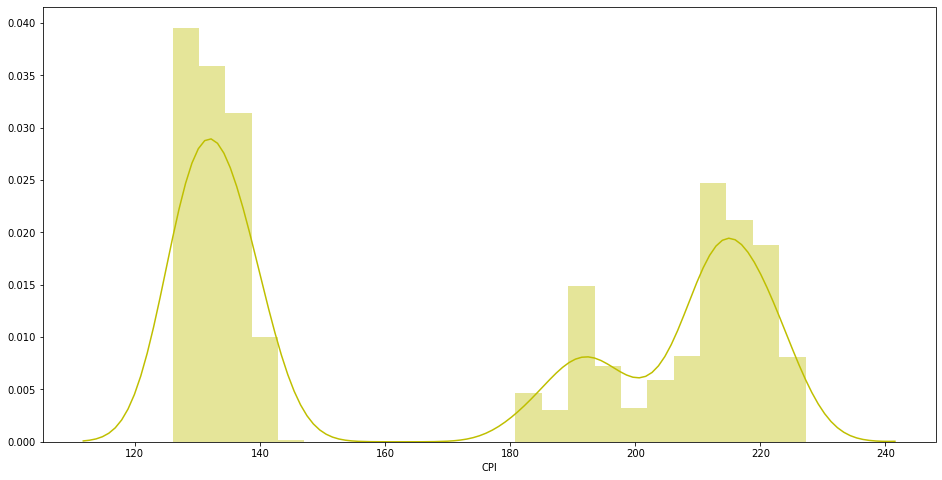

In [33]:
plt.figure(figsize=(16,8))
sns.distplot(data['CPI'],color='y')
plt.show()

In [34]:
data['Unemployment'][:10]

348661     8.464
181501     8.067
253769     7.907
298158     8.163
85833      6.415
85146      5.667
319675    10.115
273083    14.313
42455      6.529
19169      8.200
Name: Unemployment, dtype: float64

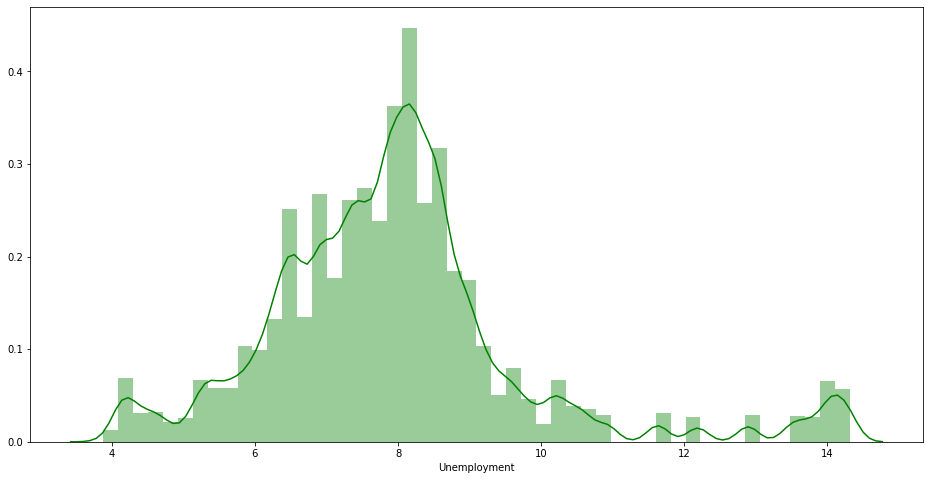

In [35]:
plt.figure(figsize=(16,8))
sns.distplot(data['Unemployment'],color='g')
plt.show()

In [36]:
data['Type'][:10]

348661    C
181501    A
253769    A
298158    A
85833     B
85146     B
319675    A
273083    A
42455     B
19169     A
Name: Type, dtype: object

In [37]:
data['Type'].value_counts()

A    25539
B    19470
C     4991
Name: Type, dtype: int64

In [38]:
data['Type'].value_counts(normalize = True)

A    0.51078
B    0.38940
C    0.09982
Name: Type, dtype: float64

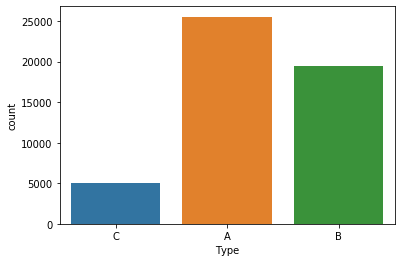

In [39]:
sns.countplot(data['Type'])
plt.show()

In [40]:
data['Size'][:10]

348661     39910
181501    203819
253769    152513
298158    203750
85833     125833
85146     125833
319675     39690
273083    206302
42455      34875
19169     202307
Name: Size, dtype: int64

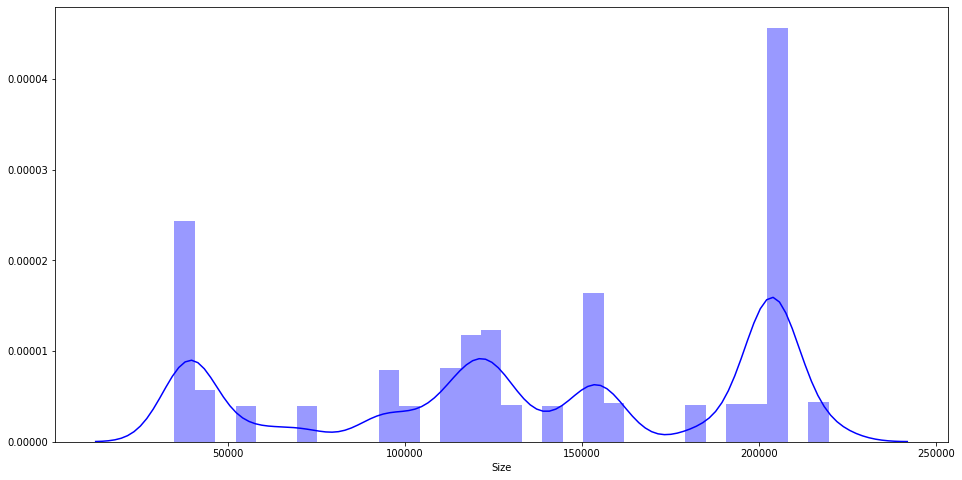

In [41]:
plt.figure(figsize=(16,8))
sns.distplot(data['Size'],color='b')
plt.show()

In [42]:
data.to_csv('walmart_50k.csv',index = False)

In [43]:
df = pd.read_csv('walmart_50k.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,37,17,2010-05-28,249.56,False,80.87,2.759,0.0,0.0,0.0,0.0,0.0,209.666051,8.464,C,39910
1,19,33,2010-12-10,9501.13,False,25.12,3.255,0.0,0.0,0.0,0.0,0.0,132.676400,8.067,A,203819
2,26,60,2011-03-25,96.80,False,22.99,3.624,0.0,0.0,0.0,0.0,0.0,133.958742,7.907,A,152513
3,31,33,2010-11-05,7145.63,False,58.71,2.689,0.0,0.0,0.0,0.0,0.0,211.613505,8.163,A,203750
4,9,74,2010-02-05,8076.88,False,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,B,125833


In [44]:
df.shape

(50000, 16)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
Store           50000 non-null int64
Dept            50000 non-null int64
Date            50000 non-null object
Weekly_Sales    50000 non-null float64
IsHoliday       50000 non-null bool
Temperature     50000 non-null float64
Fuel_Price      50000 non-null float64
MarkDown1       50000 non-null float64
MarkDown2       50000 non-null float64
MarkDown3       50000 non-null float64
MarkDown4       50000 non-null float64
MarkDown5       50000 non-null float64
CPI             50000 non-null float64
Unemployment    50000 non-null float64
Type            50000 non-null object
Size            50000 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 5.8+ MB


In [46]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [47]:
len(df.columns)

16

# Correlation

In [48]:
corr_matrix = df.corr()

In [49]:
corr_df = corr_matrix['Weekly_Sales'].sort_values(ascending = False)
corr_df

Weekly_Sales    1.000000
Size            0.240998
Dept            0.143579
MarkDown1       0.039839
MarkDown5       0.039438
MarkDown3       0.038997
MarkDown4       0.034335
MarkDown2       0.014134
IsHoliday       0.009686
Fuel_Price      0.001039
Temperature     0.000846
Unemployment   -0.021120
CPI            -0.024192
Store          -0.083689
Name: Weekly_Sales, dtype: float64

# Handling Categorical Data

In [50]:
le_IsHoliday = LabelEncoder()
df['IsHoliday'] = le_IsHoliday.fit_transform(df['IsHoliday'])

In [51]:
df['IsHoliday'][:5]

0    0
1    0
2    0
3    0
4    0
Name: IsHoliday, dtype: int64

In [52]:
df['Type'].value_counts()

A    25539
B    19470
C     4991
Name: Type, dtype: int64

In [53]:
type_df = pd.get_dummies(df['Type'],drop_first = True,prefix = 'Type')
type_df.head()

,Type_B,Type_C
0,0,1
1,0,0
2,0,0
3,0,0
4,1,0


In [54]:
df = pd.concat([df,type_df],axis=1)

In [55]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Type_B,Type_C
0,37,17,2010-05-28,249.56,0,80.87,2.759,0.0,0.0,0.0,0.0,0.0,209.666051,8.464,C,39910,0,1
1,19,33,2010-12-10,9501.13,0,25.12,3.255,0.0,0.0,0.0,0.0,0.0,132.676400,8.067,A,203819,0,0
2,26,60,2011-03-25,96.80,0,22.99,3.624,0.0,0.0,0.0,0.0,0.0,133.958742,7.907,A,152513,0,0
3,31,33,2010-11-05,7145.63,0,58.71,2.689,0.0,0.0,0.0,0.0,0.0,211.613505,8.163,A,203750,0,0
4,9,74,2010-02-05,8076.88,0,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,B,125833,1,0


In [56]:
df.drop('Type', axis = 1 , inplace = True)

In [57]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C'],
      dtype='object')

# Handling Dates

In [58]:
df.Date.dtype

dtype('O')

In [59]:
date = pd.to_datetime(df['Date'])
date[:10]

0   2010-05-28
1   2010-12-10
2   2011-03-25
3   2010-11-05
4   2010-02-05
5   2012-01-27
6   2010-02-26
7   2010-11-12
8   2011-07-29
9   2010-05-28
Name: Date, dtype: datetime64[ns]

In [60]:
date.dt.month[:10]

0     5
1    12
2     3
3    11
4     2
5     1
6     2
7    11
8     7
9     5
Name: Date, dtype: int64

In [61]:
date.dt.year[:10]

0    2010
1    2010
2    2011
3    2010
4    2010
5    2012
6    2010
7    2010
8    2011
9    2010
Name: Date, dtype: int64

In [62]:
date.dt.day[:10]

0    28
1    10
2    25
3     5
4     5
5    27
6    26
7    12
8    29
9    28
Name: Date, dtype: int64

In [63]:
df['Month'] = date.dt.month

In [64]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [65]:
df['Year'] = date.dt.year
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C', 'Month',
       'Year'],
      dtype='object')

In [66]:
df.drop(['Date','Year'],axis = 1,inplace = True)

In [67]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [68]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_B,Type_C,Month
0,37,17,249.56,0,80.87,2.759,0.0,0.0,0.0,0.0,0.0,209.666051,8.464,39910,0,1,5
1,19,33,9501.13,0,25.12,3.255,0.0,0.0,0.0,0.0,0.0,132.676400,8.067,203819,0,0,12
2,26,60,96.80,0,22.99,3.624,0.0,0.0,0.0,0.0,0.0,133.958742,7.907,152513,0,0,3
3,31,33,7145.63,0,58.71,2.689,0.0,0.0,0.0,0.0,0.0,211.613505,8.163,203750,0,0,11
4,9,74,8076.88,0,38.01,2.572,0.0,0.0,0.0,0.0,0.0,214.655459,6.415,125833,1,0,2


In [69]:
corr_matrix = df.corr()
corr_df = corr_matrix['Weekly_Sales'].sort_values(ascending = False)
corr_df

Weekly_Sales    1.000000
Size            0.240998
Dept            0.143579
MarkDown1       0.039839
MarkDown5       0.039438
MarkDown3       0.038997
MarkDown4       0.034335
Month           0.030950
MarkDown2       0.014134
IsHoliday       0.009686
Fuel_Price      0.001039
Temperature     0.000846
Unemployment   -0.021120
CPI            -0.024192
Store          -0.083689
Type_C         -0.098046
Type_B         -0.127385
Name: Weekly_Sales, dtype: float64

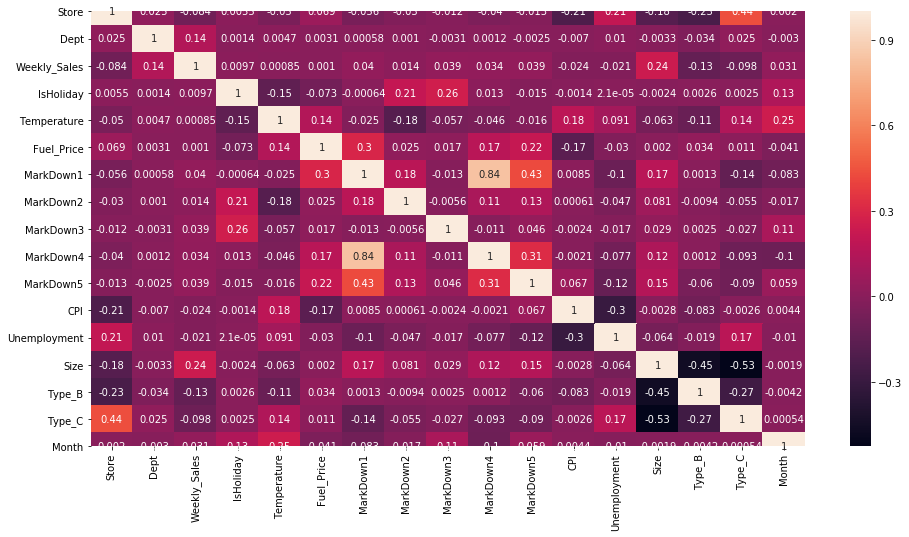

In [70]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [71]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type_B', 'Type_C',
       'Month'],
      dtype='object')

In [72]:
len(df.columns)

17

In [73]:
df.drop(['CPI','Unemployment','Fuel_Price'], axis = 1 , inplace = True)

In [74]:
len(df.columns)

14

In [75]:
X = df.drop('Weekly_Sales',axis = True).values

In [76]:
X.shape

(50000, 13)

In [77]:
Y = df['Weekly_Sales'].values

In [78]:
Y.shape

(50000,)

# Splitting the data

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state=100)

In [81]:
x_train.shape

(40000, 13)

In [82]:
x_test.shape

(10000, 13)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_pred = lr.predict(x_test)

In [86]:
y_pred

array([ 8043.15606509, 23145.25868369, 22195.49960974, ...,
       13209.00558761, 15163.15039905, 21849.43467999])

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
mse = mean_squared_error(y_test,y_pred)
mse

465362277.2383383

In [89]:
np.sqrt(mse)

21572.25711969747

In [90]:
#from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
metrics.mean_squared_error(y_test,y_pred)
#plt.plot(y_test, y_pred,'ro')
#plt.show()

465362277.2383383

# Stochastic Gradient Descent

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
cv_score = cross_val_score(lr,x_train,y_train,n_jobs = 4,cv = 5,scoring = 'neg_mean_squared_error')

In [93]:
np.sqrt(-(cv_score))

array([20748.2301426 , 21828.98604571, 21711.1813406 , 20797.53968154,
       21610.94764919])

In [94]:
from sklearn.linear_model import SGDRegressor

In [95]:
sgd = SGDRegressor()

In [96]:
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [97]:
y_pred = sgd.predict(x_test)

In [98]:
sgd_error = mean_squared_error(y_test,y_pred)

In [99]:
metrics.mean_squared_error(y_test,y_pred)

9.364876920246185e+36

In [100]:
sgd_error

9.364876920246185e+36

In [101]:
np.sqrt(sgd_error)

3.0602086399861996e+18